# Classification Cluster

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# Get S&P500 stock symbols, sectors, and subsectors from wikipedia
wiki_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies',header=0)[0]
symbols = list(wiki_table['Ticker symbol'])

In [10]:
print(symbols)
print("\nTotal number of companies are:")
len(symbols)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX

505

In [11]:
# Fetch the list of stocks for our symbols from Yahoo Finance History Prices 
start = '2017-01-01'
end = '2017-12-31'

print("Downloading values for period %s to %s" % (start, end))
dataset = yf.download(symbols,start,end)['Adj Close']
print("Done!")

[*********************100%***********************]  505 of 505 downloaded
Done!


In [12]:
dataset.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,45.764454,45.590179,170.015747,113.013916,57.952969,80.150398,112.360001,37.477722,113.159943,103.480003,...,38.389378,56.932369,84.925102,57.858753,25.919497,48.598770,61.319050,101.874840,42.171959,52.963348
2017-01-04,46.364933,45.984047,171.410950,112.887413,58.770123,82.139374,115.739998,37.775249,113.432007,104.139999,...,38.559494,56.517933,83.990730,58.332508,26.897594,49.323105,61.542175,102.811455,42.777485,53.477272
2017-01-05,45.813671,45.186462,171.291336,113.461502,59.215847,81.188530,114.809998,38.101559,111.731606,105.910004,...,38.559494,55.833622,82.738670,57.572517,26.784735,48.872841,61.745895,103.472023,42.084061,53.299377
2017-01-06,47.241043,45.501560,169.049072,114.726402,59.234417,82.275185,115.419998,39.138073,113.004478,108.300003,...,38.672909,56.913094,82.691956,57.533035,26.370926,48.530254,62.492851,103.481880,42.357521,53.467388
2017-01-09,47.388699,46.358227,168.949417,115.777237,59.624420,82.934944,117.110001,39.099686,111.741318,108.570000,...,38.086956,56.922737,81.327774,57.710697,26.220448,48.324699,62.667465,105.493156,41.898495,53.319145


In [14]:
import math
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = dataset.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
returns['Volatility'] = dataset.pct_change().std() * math.sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#cleaned_data

In [16]:
X = cleaned_data

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Define the number of clusters in a variable 'n_clusters'
n_clusters = 12

# Cluster the data
kmeans = KMeans(n_clusters)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

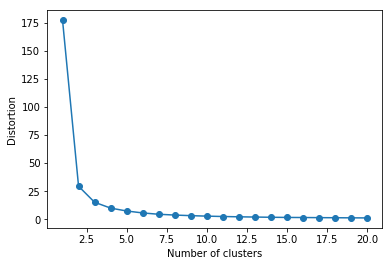

In [20]:
from sklearn.cluster import KMeans

min_clusters = 1
max_clusters = 20
distortions = []
for i in range(min_clusters, max_clusters+1):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
    
# Plot
plt.plot(range(min_clusters, max_clusters+1), distortions, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.show()

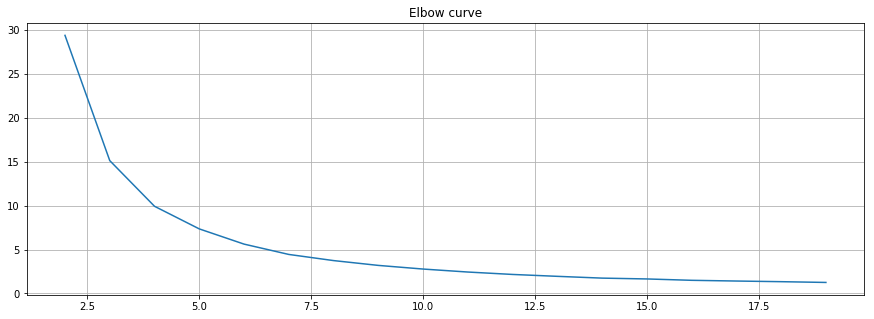

In [22]:
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [25]:
from scipy.cluster.vq import kmeans,vq
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)
# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids)
 
data = cleaned_data

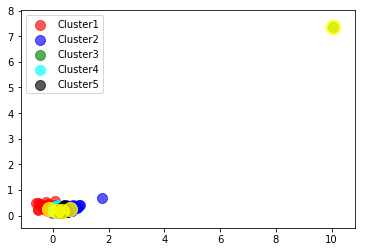

In [26]:
# Plot Scatter
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

In [27]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [28]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=10)

,Stock Symbol,Cluster
0,A,4
1,AAL,3
2,AAP,0
3,AAPL,4
4,ABBV,1
5,ABC,3
6,ABMD,1
7,ABT,4
8,ACN,4
9,ADBE,1
